## Load the dataset ##

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [3]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Code

In [5]:
print(breast_cancer.target_names)
target = breast_cancer.target
input = breast_cancer.data

['malignant' 'benign']


In [6]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

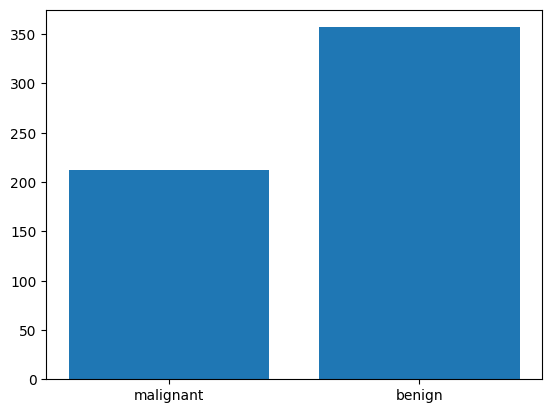

In [7]:
counts = [sum(breast_cancer.target == 0), sum(breast_cancer.target == 1)]
plt.bar(breast_cancer.target_names, counts)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input = scaler.fit_transform(input)

In [9]:
print(input.shape)
print(target.shape)

(569, 30)
(569,)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.3, random_state= 42)

In [11]:
model = LogisticRegression()
model = model.fit(x_train, y_train)

In [12]:
predict = model.predict(x_test)

## Testing ##

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [17]:
acc = accuracy_score(y_test, predict)
print(f"Accuracy Score: {acc * 100:.2f}%")

Accuracy Score: 98.25%


In [18]:
print("Classification Report: \n", classification_report(y_test, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [19]:
prec = precision_score(y_test, predict, average='macro')
print(f"Precision Score: {prec * 100:.2f}%")

Precision Score: 97.97%


In [26]:
rec = recall_score(y_test, predict, average='macro')
print(f"Recall Score: {rec * 100:.2f}%")

Recall Score: 98.28%


In [27]:
f1 = f1_score(y_test, predict, average='macro')
print(f"F1 Score: {f1*100:.2f}%")

F1 Score: 98.12%


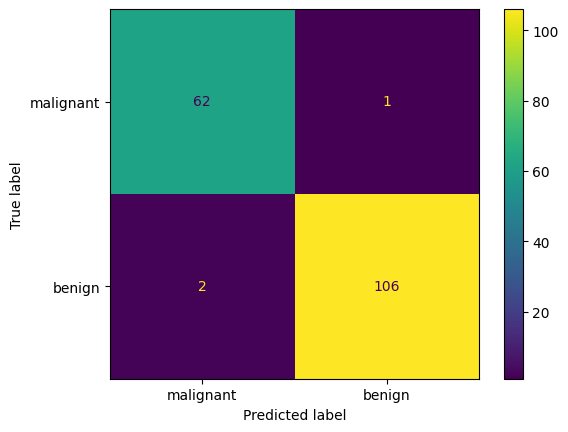

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(cm, display_labels = breast_cancer.target_names)
disp.plot()

In [21]:
import matplotlib.pyplot as plt

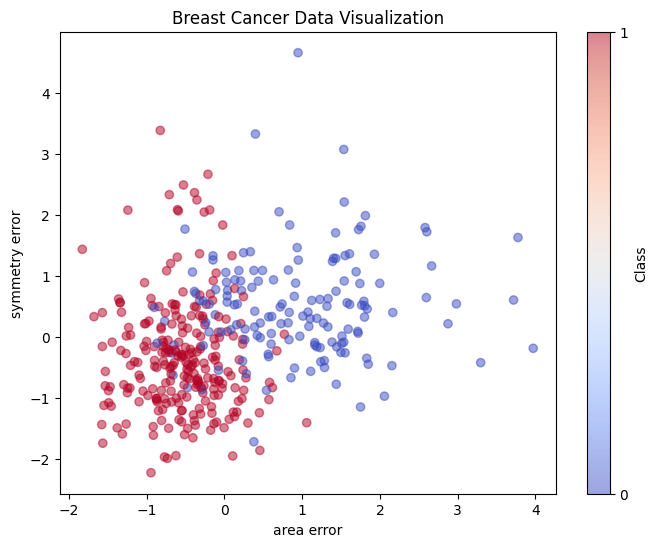

In [22]:
plt.figure(figsize = (8,6))
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train, cmap = 'coolwarm', alpha = 0.5)
plt.xlabel(breast_cancer.feature_names[13])
plt.ylabel(breast_cancer.feature_names[18])
plt.title('Breast Cancer Data Visualization')
plt.colorbar(ticks = [0,1], label = 'Class')
plt.show()

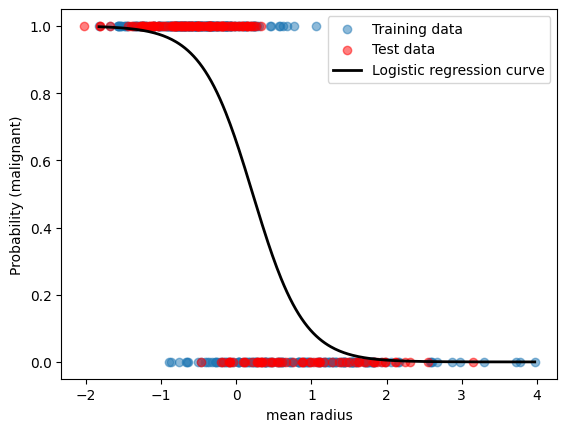

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

feature_idx = 0
X_single_feature = x_train[:, feature_idx]
X_single_feature_test = x_test[:, feature_idx]

model_single = LogisticRegression()
model_single.fit(X_single_feature.reshape(-1, 1), y_train)

X_plot = np.linspace(X_single_feature.min(), X_single_feature.max(), 300)

y_plot = expit(X_plot * model_single.coef_[0][0] + model_single.intercept_[0])

plt.scatter(X_single_feature, y_train, alpha=0.5, label='Training data')
plt.scatter(X_single_feature_test, y_test, alpha=0.5, label='Test data', color='red')
plt.plot(X_plot, y_plot, color='black', linewidth=2, label='Logistic regression curve')
plt.xlabel(breast_cancer.feature_names[feature_idx])
plt.ylabel('Probability (malignant)')
plt.legend()
plt.show()
